<a href="https://colab.research.google.com/github/DangerDR0519/NeuralNetworks/blob/main/ICP-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
df = pd.read_csv('data.csv')

# New Section

In [6]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [7]:
df.isnull().sum()  # To check for null values
df.fillna(df.mean(), inplace=True)  # Replacing null values with the mean

In [9]:
print(df[['Duration', 'Calories']].agg(['min', 'max', 'count', 'mean']))

         Duration     Calories
min     15.000000    50.300000
max    300.000000  1860.400000
count  169.000000   169.000000
mean    63.846154   375.790244


In [11]:
df_filtered = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
df_filtered

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [13]:
df_filtered = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
df_filtered

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [15]:
df_modified = df.drop('Maxpulse', axis=1)
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [16]:
df.drop('Maxpulse', axis=1, inplace=True)

In [17]:
df['Calories'] = df['Calories'].astype(int)

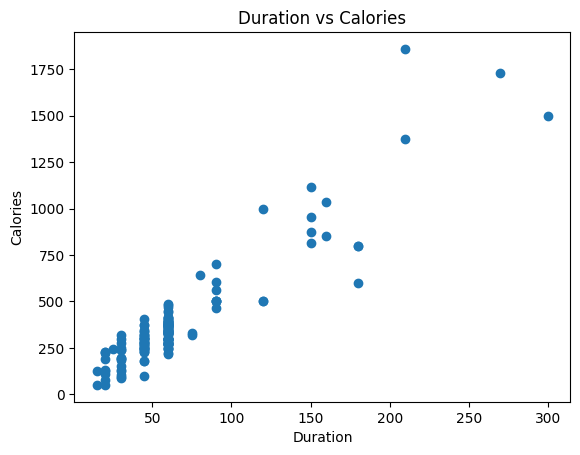

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df['Duration'], df['Calories'])
plt.title('Duration vs Calories')
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.show()

In [ ]:
#2nd question

In [22]:
# a) Import necessary libraries and read the CSV file
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the data from 'Salary_Data.csv'
df = pd.read_csv('Salary_Data.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [23]:
# b) Split the data into train and test partitions
X = df[['YearsExperience']]  # Features (independent variable)
y = df['Salary']  # Target (dependent variable)
# Split the data, reserving 1/3 as the test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
# c) Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [25]:
# d) Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 35301898.887134895


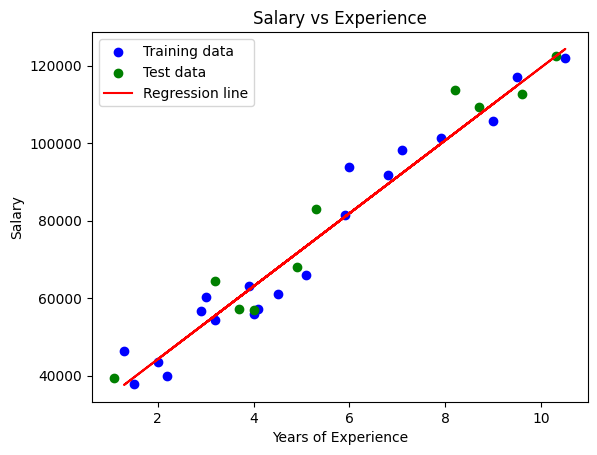

In [26]:
# e) Visualize both train and test data using scatter plot
# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the regression line
plt.plot(X_train, model.predict(X_train), color='red', label='Regression line')

plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()